# Lab2: SVM

---
本次实验使用到以下库

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC

## 1 数据生成与可视化分析

按照作业要求生成随机数据，把数据可视化。

In [4]:
# 生成SVM数据
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

把`numpy array`类型的数据转换成`dataframe`的格式，便于使用`seaborn`绘图。

In [8]:
df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = Y
df.head()

,x1,x2,y
0,-0.235948,-1.599843,-1
1,-1.021262,0.240893,-1
2,-0.132442,-2.977278,-1
3,-1.049912,-2.151357,-1
4,-2.103219,-1.589401,-1


<Axes: xlabel='x1', ylabel='x2'>

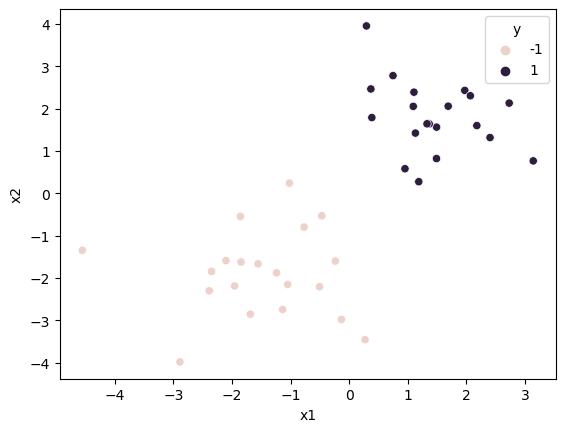

In [9]:
sns.scatterplot(df,x='x1',y='x2',hue='y')

可以发现数据可以进行线性分类，两类数据具有明显分界。

----
## 2 SVM拟合计算

核函数选择线性核函数。

In [21]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(X,Y)

support_vectors = svm.support_vectors_
print("support_vectors:")
print(support_vectors)

coef = svm.coef_
intercept = svm.intercept_
print("coef:")
print(coef)

support_vectors:
[[-1.02126202  0.2408932 ]
 [-0.46722079 -0.53064123]
 [ 0.95144703  0.57998206]]
coef:
[[0.90230696 0.64821811]]


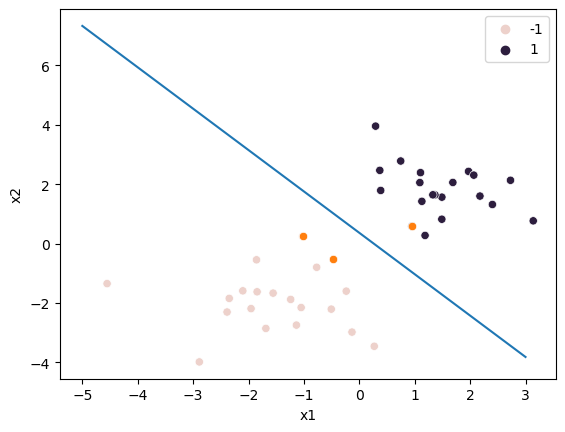

In [33]:
sns.scatterplot(df,x='x1',y='x2',hue='y')
sns.scatterplot(x=support_vectors[:,0],y=support_vectors[:,1])

k = coef[0,0]/(-coef[0,1])
b = intercept/(-coef[0,1])
hyperplane_x = [i-5 for i in range(9)]
hyperplane_y = [k*(i-5)+b for i in range(9)]
plt.plot(hyperplane_x,hyperplane_y)